In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weight-height/weight-height.csv


⚖️ **Weight Prediction**


Steps  

*  Explore Problem
Problem is to predict Human Weight with Given Height.

* Indentify Data
Dataset are availble in the repo.


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score


In [3]:
data = pd.read_csv("../input/weight-height/weight-height.csv")

****Explore Data****

In [4]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


****Clean Data****

In [7]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [8]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [9]:
# Convert Height(Inches) to Height(Feet) [1 Inche = 0.083 Foot]
data['Height'] = round(data['Height'].apply(lambda x : x * 0.083),1)
data.head()

,Gender,Height,Weight
0,Male,6.1,241.893563
1,Male,5.7,162.310473
2,Male,6.2,212.740856
3,Male,6.0,220.042470
4,Male,5.8,206.349801


In [10]:
# Convert Weight(Pounds) to Weight(Kilogram) [1 Pounds = 0.4536 Kilograms]
data['Weight'] = round(data['Weight'].apply(lambda x : x * 0.4563),3)
data.head()

,Gender,Height,Weight
0,Male,6.1,110.376
1,Male,5.7,74.062
2,Male,6.2,97.074
3,Male,6.0,100.405
4,Male,5.8,94.157


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [12]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,5.508530,73.665235
std,0.320585,14.651084
min,4.500000,29.523000
25%,5.300000,61.973500
50%,5.500000,73.561000
75%,5.700000,85.405500
max,6.600000,123.196000


In [13]:
data['Gender'].value_counts()



Male      5000
Female    5000
Name: Gender, dtype: int64

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



****Visualize Data****

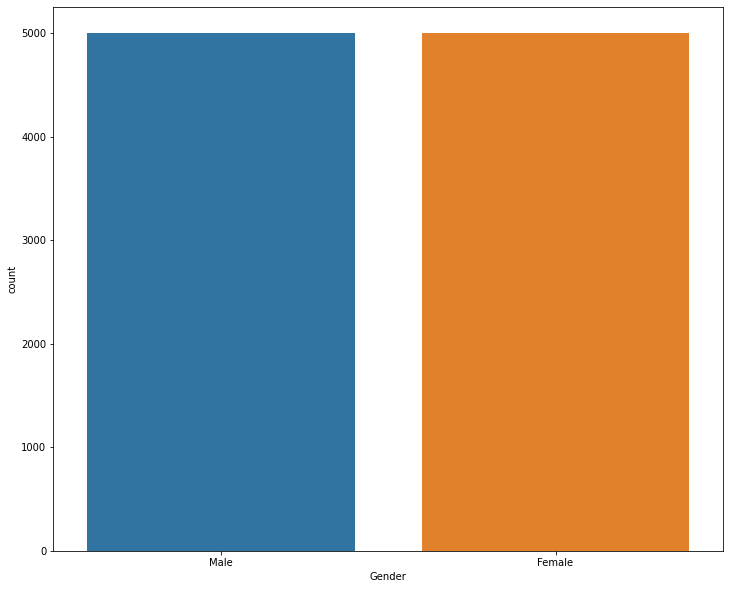

In [15]:
plt.figure(figsize=(12,10))
sns.countplot(data['Gender'])
plt.show()

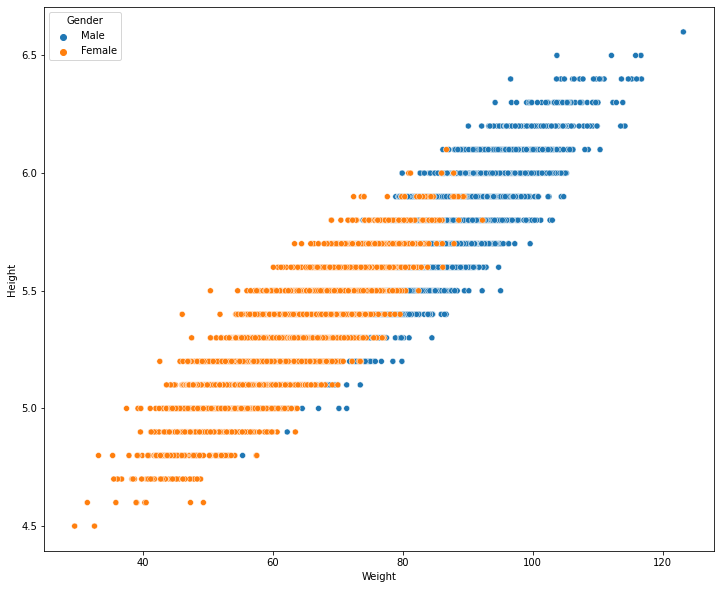

In [16]:
plt.figure(figsize=(12,10))
sns.scatterplot(y=data['Height'],x=data['Weight'], hue=data['Gender'])
plt.show()

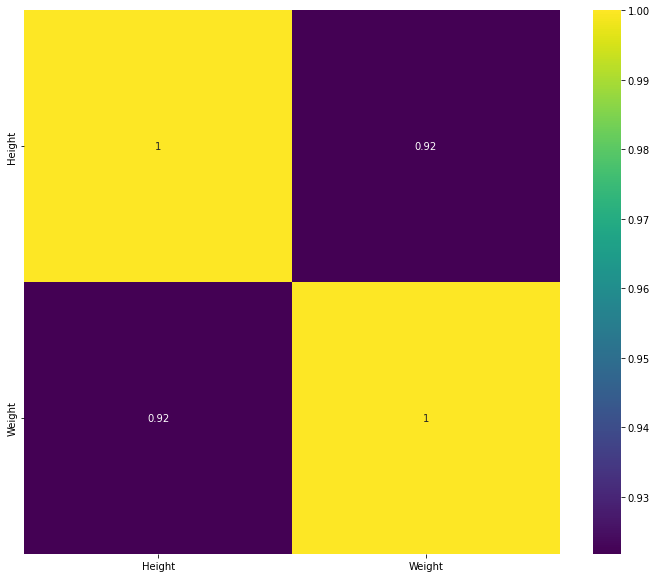

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True, cmap='viridis')
plt.show()

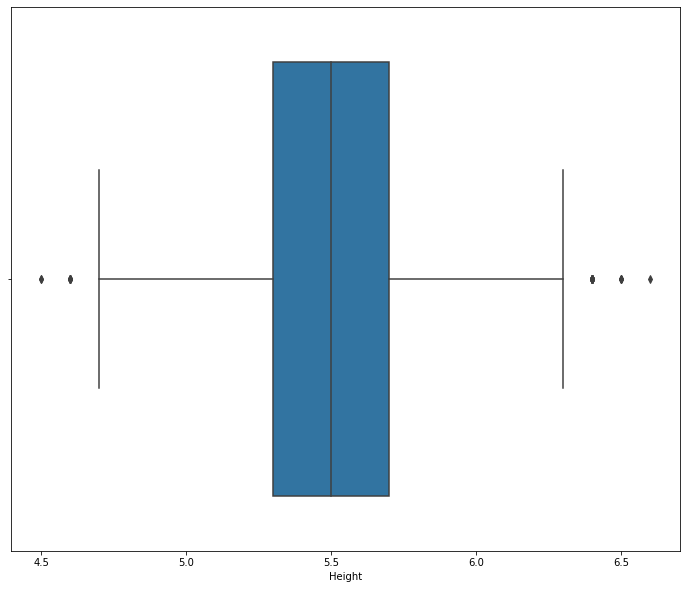

In [18]:
plt.figure(figsize=(12,10))
sns.boxplot(data['Height'])
plt.show()

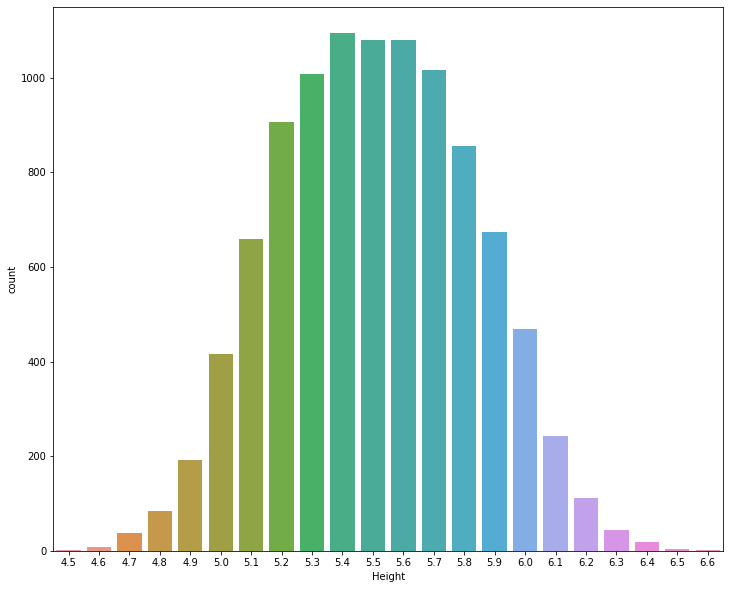

In [19]:
plt.figure(figsize=(12,10))
sns.countplot(data['Height'])
plt.show()

In [20]:
data['Height'].unique()

array([6.1, 5.7, 6.2, 6. , 5.8, 5.6, 5.3, 5.9, 5.4, 5.5, 5.2, 5.1, 6.4,
       6.3, 5. , 6.5, 6.6, 4.9, 4.8, 4.7, 4.6, 4.5])

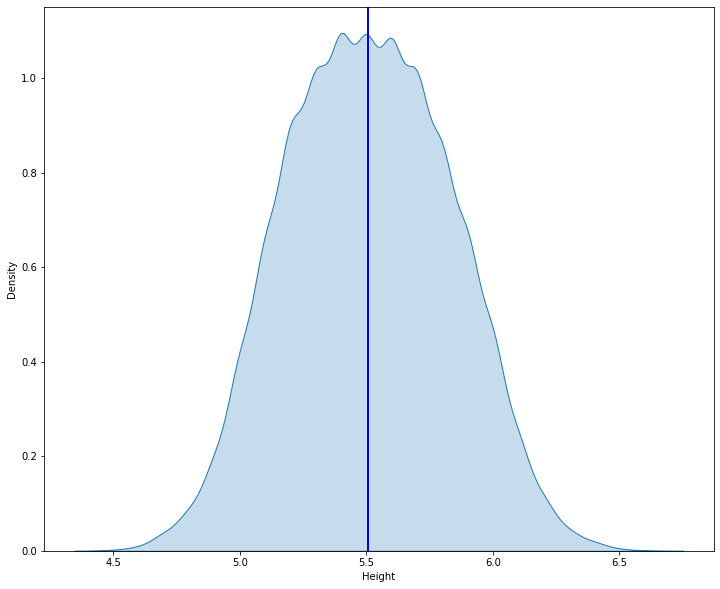

In [21]:
plt.figure(figsize=(12,10))
sns.kdeplot(data['Height'], shade=True)
plt.axvline(data['Height'].mean(), color='blue',linewidth=2)
plt.show()

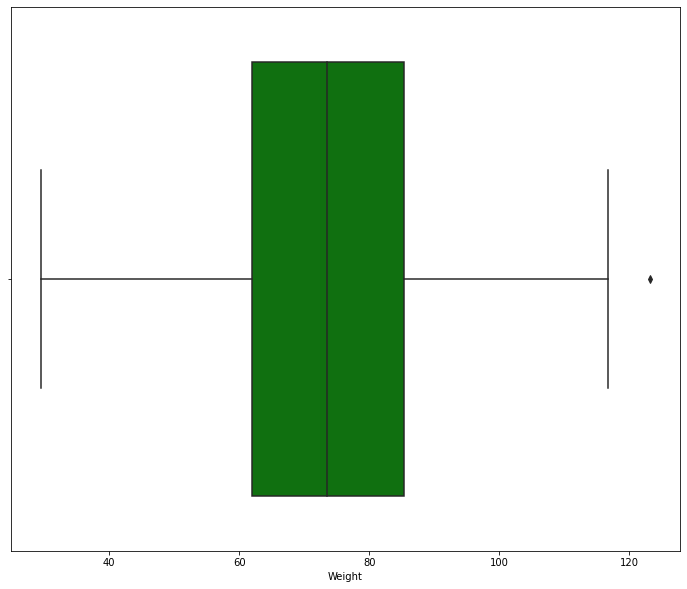

In [22]:
plt.figure(figsize=(12,10))
sns.boxplot(data['Weight'], color='green')
plt.show()

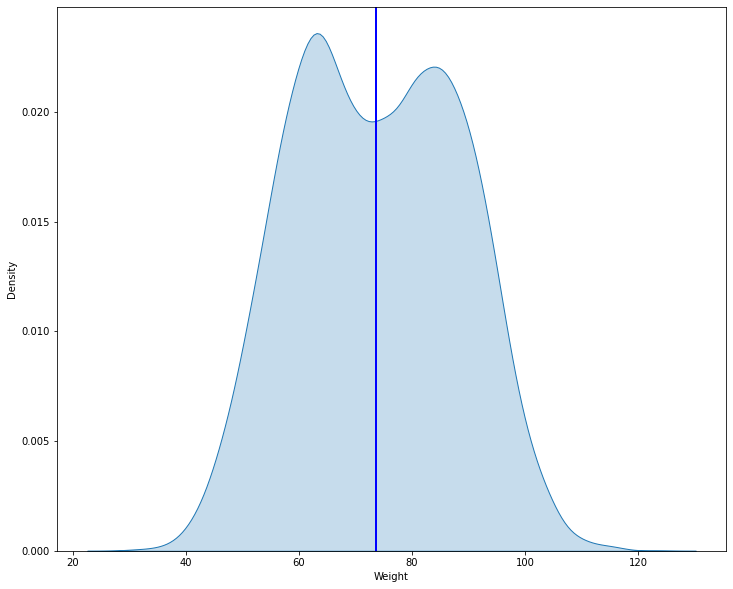

In [24]:
plt.figure(figsize=(12,10))
sns.kdeplot(data['Weight'], shade = True)
plt.axvline(data['Weight'].mean(), color='blue', linewidth=2)
plt.show()

<Figure size 2520x2520 with 0 Axes>

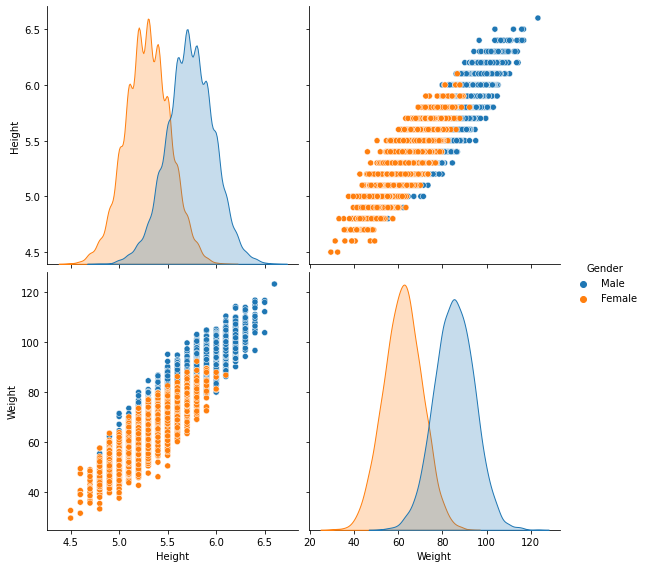

In [26]:
plt.figure(figsize=(35,35))
sns.pairplot(data, hue='Gender', size=4)
plt.show()

In [27]:
data.groupby(by='Gender').corr()

Height    Weight
Gender                           
Female Height  1.000000  0.843485
       Weight  0.843485  1.000000
Male   Height  1.000000  0.859026
       Weight  0.859026  1.000000

In [28]:
data_original=data.copy(deep=True)
data_Try=data.copy(deep=True)

****Label Encode****

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_Try['Gender'] = le.fit_transform(data_Try['Gender'])
data_Try.head()

,Gender,Height,Weight
0,1,6.1,110.376
1,1,5.7,74.062
2,1,6.2,97.074
3,1,6.0,100.405
4,1,5.8,94.157


In [32]:
data_Try['Gender'].unique()

array([1, 0])

****Scalized****

In [35]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
data_Try['Height']= sc.fit_transform(data_Try[['Height']])

In [36]:
data_Try

,Gender,Height,Weight
0,1,1.845065,110.376
1,1,0.597282,74.062
2,1,2.157011,97.074
3,1,1.533120,100.405
4,1,0.909228,94.157
...,...,...,...
9995,0,-0.026609,62.412
9996,0,0.285337,77.967
9997,0,-0.650500,58.623
9998,0,0.597282,74.766


In [38]:
X = data_Try.drop(columns='Weight')
y = data_Try['Weight']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [42]:
X_train.shape

(8000, 2)

In [43]:
data_Try.corr()

,Gender,Height,Weight
Gender,1.000000,0.688558,0.796723
Height,0.688558,1.000000,0.921809
Weight,0.796723,0.921809,1.000000


****Model Section****

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV



In [45]:
model_parameter ={

"Linear_Regression" :{
                        "model" : LinearRegression(),
                        "param" : {}
                    },

"Decision_Tree_Regressor" :{
                        "model" : DecisionTreeRegressor(),
                        "param" : {
                                   'splitter' : ["best"],
                                   'ccp_alpha':[0.1,0.0,0.3]
                                  }
                            },

"SVR" : {
                        "model" : SVR(),
                        "param" : {}
       },

"KNeighbors_Classifier_Regressor" : {
                        "model" : KNeighborsRegressor(),
                        "param" : {'n_neighbors' : [4,5,6],
                                  'weights' : ['uniform', 'distance']
                                  }
},
                       

"Random_Forest_Regressor" :{
                    "model" : RandomForestRegressor(),
                    "param" : {'criterion' : ["squared_error", "absolute_error"],
                              'n_estimators':[100,85,90]
                              }
                      },
    

"Bagging_Regressor" :{
                    "model" : BaggingRegressor(oob_score=True,max_samples = 0.8),
                    "param" : {}
                      },

 "AdaBoost_Regressor" :{
                    "model" : AdaBoostRegressor(),
                    "param" : {}
                      },

"Gradient_Boosting_Regressor" :{
                    "model" : GradientBoostingRegressor(),
                    "param" : {}
                      },

"XGB_Regressor" :{
                    "model" : XGBRegressor(),
                    "param" : {}
                      },
}

In [48]:
Report = []
for model_name ,model_param in model_parameter.items():
    gs = GridSearchCV(model_param['model'],model_param['param'],cv = 5,return_train_score=False)
    gs.fit(X,y)
    Report.append({'Model': model_name,
                 'Best_Score' : gs.best_score_,
                 'Best_Parameter' : gs.best_params_})

Model_Report = pd.DataFrame(Report,columns=['Model','Best_Score','Best_Parameter'])

In [50]:
Model_Report.sort_values(by='Best_Score', ascending = False)

,Model,Best_Score,Best_Parameter
0,Linear_Regression,0.758140,{}
4,Random_Forest_Regressor,0.756751,"{'criterion': 'squared_error', 'n_estimators':..."
1,Decision_Tree_Regressor,0.756711,"{'ccp_alpha': 0.0, 'splitter': 'best'}"
7,Gradient_Boosting_Regressor,0.756690,{}
8,XGB_Regressor,0.756655,{}
5,Bagging_Regressor,0.756652,{}
2,SVR,0.750726,{}
6,AdaBoost_Regressor,0.737644,{}
3,KNeighbors_Classifier_Regressor,0.700652,"{'n_neighbors': 6, 'weights': 'distance'}"


In [51]:
model_clf = {
    'RFR' : RandomForestRegressor(criterion= 'squared_error', n_estimators= 100),
    'DTR': DecisionTreeRegressor(ccp_alpha = 0.0, splitter= 'best'),
    'XGB' :XGBRegressor(),
    'GBR':GradientBoostingRegressor(),
    'BR':BaggingRegressor(),
    'LR':LinearRegression(),
    'ABR':AdaBoostRegressor(),
    'SVR':SVR(),
    'KNNR':KNeighborsRegressor(n_neighbors= 4, weights= 'distance')
}

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [53]:
def train_regression(clf, X_train,y_train,X_test,y_test):
    
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)*100
    return score


In [54]:
train_regression(LinearRegression(), X_train,y_train,X_test,y_test)

90.01954784874371

In [55]:
Score =[] 

for model_name,clf in model_clf.items():

    score= train_regression(clf, X_train,y_train,X_test,y_test)

    Score.append({'Model': model_name,
                 'Score' : score,
                 
                 })
Score_Report = pd.DataFrame(Score,columns=['Model','Score']) 
Score_Report

,Model,Score
0,RFR,89.999913
1,DTR,89.999022
2,XGB,89.999044
3,GBR,90.006275
4,BR,90.007061
5,LR,90.019548
6,ABR,89.182401
7,SVR,89.940822
8,KNNR,87.050188


In [56]:


Score_Report.sort_values(by='Score',ascending=False)



,Model,Score
5,LR,90.019548
4,BR,90.007061
3,GBR,90.006275
0,RFR,89.999913
2,XGB,89.999044
1,DTR,89.999022
7,SVR,89.940822
6,ABR,89.182401
8,KNNR,87.050188


****Sklearn Pipeline****

In [57]:


X = data_original[['Gender','Height']]
y = data_original['Weight']
X.head()



,Gender,Height
0,Male,6.1
1,Male,5.7
2,Male,6.2
3,Male,6.0
4,Male,5.8


In [58]:


labelized = LabelEncoder()
X['Gender']=labelized.fit_transform(X['Gender'])
X.head()



,Gender,Height
0,1,6.1
1,1,5.7
2,1,6.2
3,1,6.0
4,1,5.8


In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [60]:


X_test



,Gender,Height
7010,0,5.3
3509,1,5.9
2309,1,5.9
9092,0,5.0
8813,0,5.2
...,...,...
2978,1,5.7
7568,0,5.4
372,1,5.7
7126,0,5.0


In [61]:


from sklearn.pipeline import Pipeline



In [62]:


pipe = Pipeline([('scalized', StandardScaler()),
                    ('LR',LinearRegression())])



In [63]:


pipe.fit(X_train,y_train)



Pipeline(steps=[('scalized', StandardScaler()), ('LR', LinearRegression())])

In [64]:
pipe.score(X_test,y_test)*100

90.07734678778473

In [65]:
pipe.predict([[1,5]])[0]


61.75221053148141

In [66]:
import joblib

In [67]:


joblib.dump(pipe,"Weight.lr")



['Weight.lr']

In [68]:
model=joblib.load('Weight.lr')

In [69]:
model.predict([[0,5]])[0]



52.64570944114641

In [70]:


joblib.dump(labelized,"labelized.le")



['labelized.le']

In [71]:
g=labelized.transform(['Male'])


In [72]:
round(model.predict([[g,5]])[0],2)

61.75